# Binary Classification With Gaussian Naive Bayes Model

## Problem Defenition

1. The dataset is anonymized transaction data. The predictors is data collected before the transaction, the target is whether or not the transaction was successful. Since the target has two possible values, this is a Binary Classification problem.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.utils import shuffle

## Data Loading

- Data obtained from https://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv

In [2]:
path = 'Transaction.train.csv'
raw_transaction_data = pd.read_csv(path)
raw_transaction_data.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [3]:
raw_transaction_data.shape

(180000, 53)

## Data Cleaning

### Check for Null Values

In [4]:
raw_transaction_data.isnull().sum()

Unnamed: 0    0
ID_code       0
target        0
var_0         0
var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
var_11        0
var_12        0
var_13        0
var_14        0
var_15        0
var_16        0
var_17        0
var_18        0
var_19        0
var_20        0
var_21        0
var_22        0
var_23        0
var_24        0
var_25        0
var_26        0
var_27        0
var_28        0
var_29        0
var_30        0
var_31        0
var_32        0
var_33        0
var_34        0
var_35        0
var_36        0
var_37        0
var_38        0
var_39        0
var_40        0
var_41        0
var_42        0
var_43        0
var_44        0
var_45        0
var_46        0
var_47        0
var_48        0
var_49        0
dtype: int64

### Verify Data Types are what we Expect

In [5]:
raw_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

### Remove ID Columns 

In [6]:
clean_transaction_data = raw_transaction_data.drop(['Unnamed: 0', 'ID_code'], axis = 1)
clean_transaction_data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


### Verify Target Column has only Two Values (0, 1)

In [7]:
clean_transaction_data['target'].unique()

array([0, 1], dtype=int64)

## Exploratory Data Analysis (EDA)

### Check for Colinerarity

#### Correlation Matrix

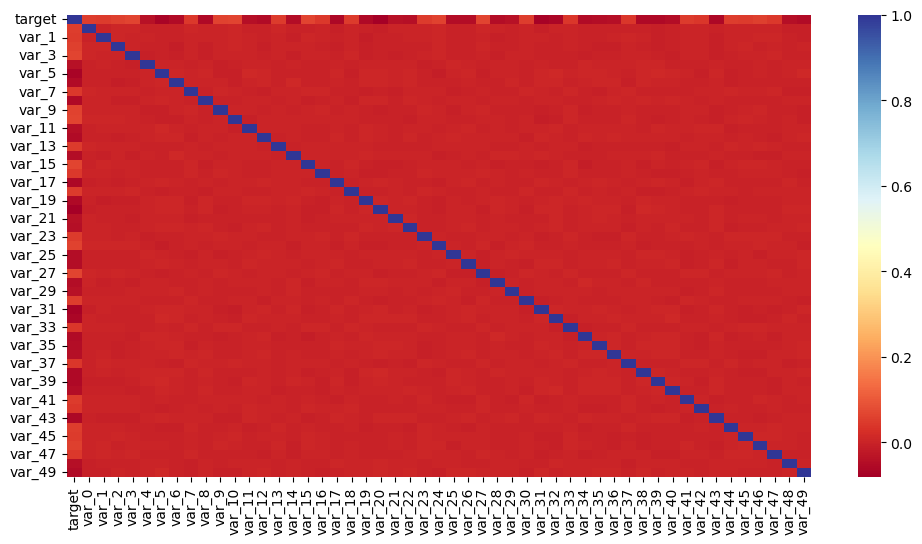

In [8]:
corr = clean_transaction_data.corr()
plt.figure(figsize=(12,6))
corr_matrix = sns.heatmap(corr, cmap='RdYlBu',annot = False) 

corr_matrix ;

- The correlation matrix demonstartes lack of colinerarity among predictors. 

### Verify distribution of Predictors are Normal.

#### Histograms

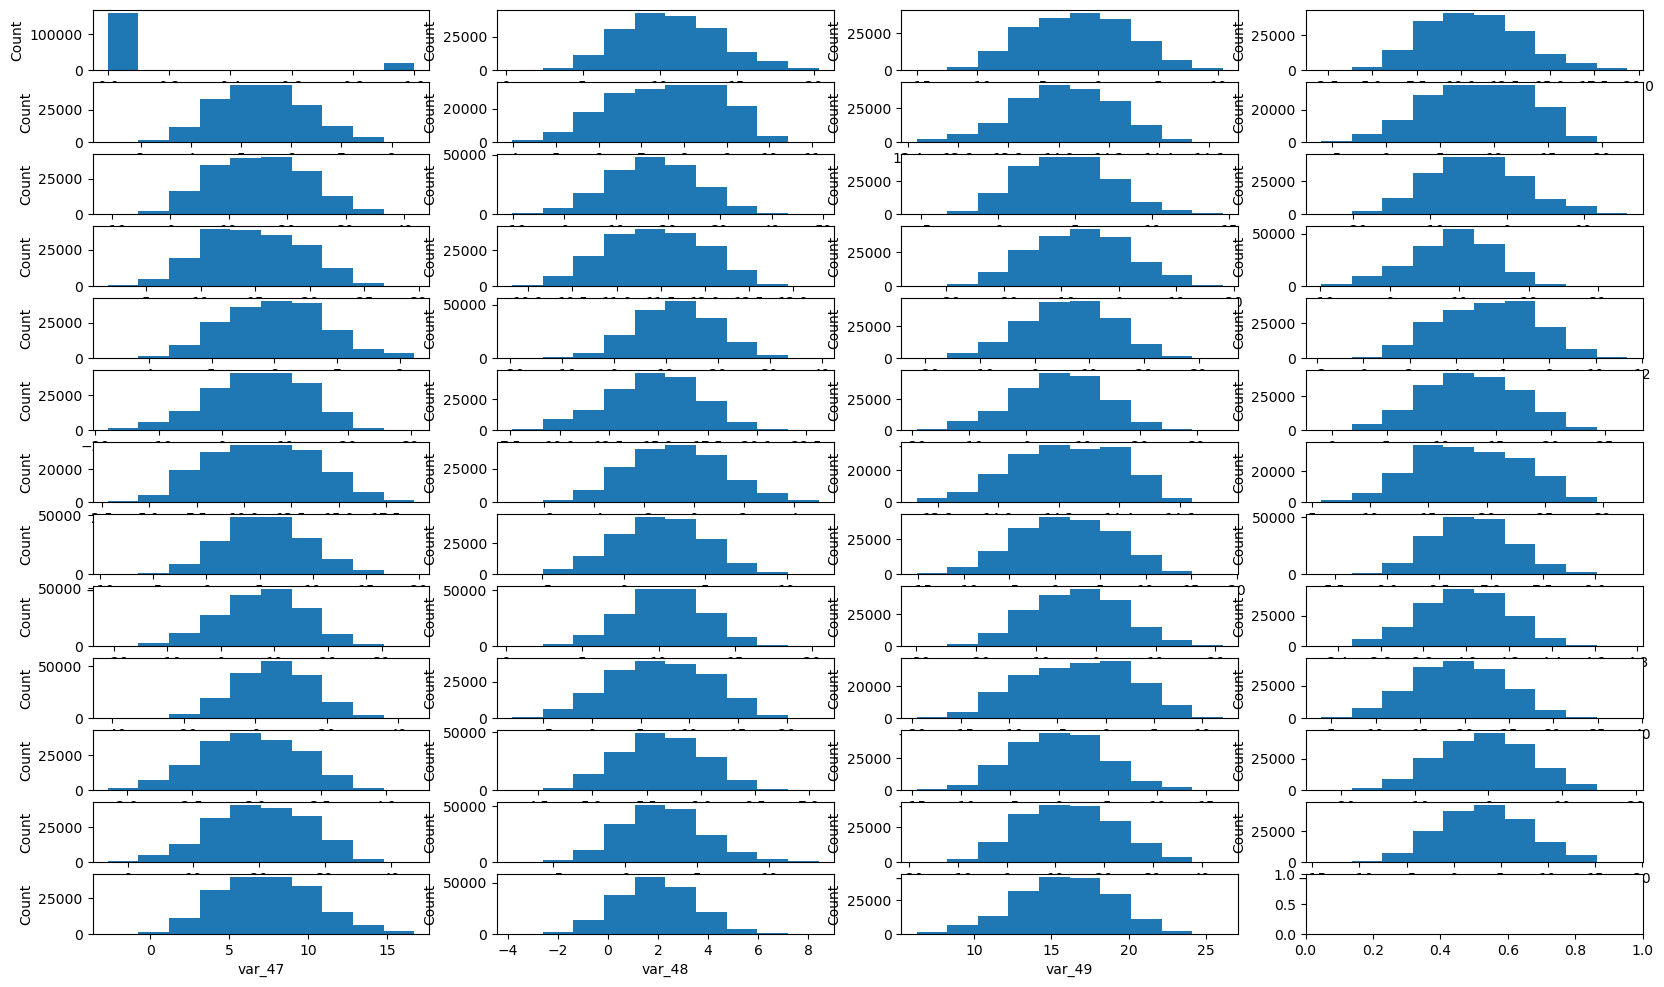

In [9]:
fig, axs = plt.subplots(13,4, figsize = (20,12))
column_names = clean_transaction_data.columns

axs = axs.flatten()[:len(column_names)]
for n, ax in enumerate(axs):
  ax.hist(clean_transaction_data[column_names[n]])
  ax.set_xlabel(column_names[n])
  ax.set_ylabel('Count')

## Data Processing

In [10]:
clean_transaction_data_copy = clean_transaction_data.copy()

### Seperate Target and Predictors

In [11]:
X = clean_transaction_data_copy.drop(['target'], axis = 1)
y = clean_transaction_data_copy['target']

### Model Selection

In [12]:
model = GaussianNB()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #split data into training and testing sets 
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

print(f"Number of mislabeled points out of {X_test.shape[0]} points: {(y_test != y_prediction).sum()}")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_prediction)}")

Number of mislabeled points out of 36000 points: 3224
Accuracy: 0.9104444444444444


### Cross Validation

In [14]:
def cross_validate(X: pd.DataFrame, y: pd.Series, num_loops: int) -> np.ndarray:
  """
  Creates a GaussianNB model.
  Randomly splits X and y values into train/test groups (test size = 20%).
  Trains GaussianNB model.
  
  Args:
      X (pd.DataFrame): Predictors DataFrame
      y (pd.Series): Target Series
      num_loops (int): Number of cross-validations to perform

  Returns:
      np.ndarray: A numpy array of the accuaracy scores of each cross validation loop
  """
  
  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_pred)

  return accuracy_scores

In [15]:
cross_validate_scores = cross_validate(X, y, 100)

## Data Visualization

### Histogram of Accuracy Scores

Text(0.5, 0, 'Accuracy Scores')

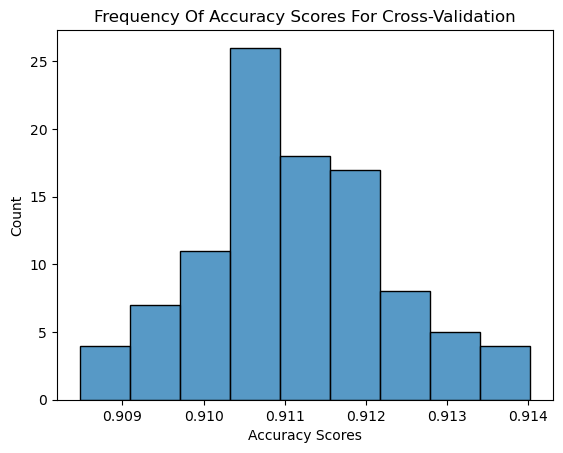

In [16]:
sns.histplot(data=cross_validate_scores)
plt.title('Frequency of accuracy scores for cross-validation'.title())
plt.xlabel('Accuracy Scores')

### Classification Report

In [17]:
class_report = classification_report(y_test, y_prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32355
           1       0.67      0.23      0.34      3645

    accuracy                           0.91     36000
   macro avg       0.79      0.61      0.65     36000
weighted avg       0.89      0.91      0.89     36000



### Confusion Matrix

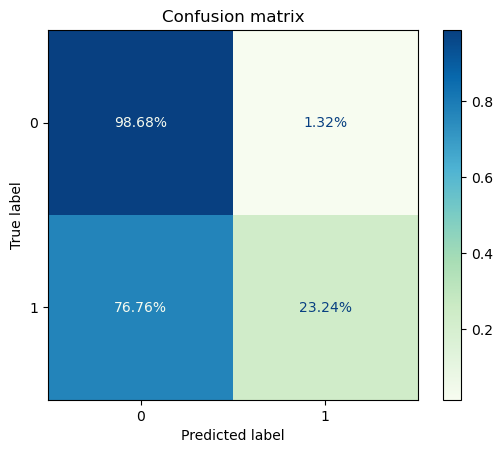

In [18]:
metrics.ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )

plt.grid(False)
plt.title('Confusion matrix') ;

## Create Balanced Dataset

In [19]:
transaction_targets_zero = clean_transaction_data[clean_transaction_data['target'] == 0]
transaction_targets_one = clean_transaction_data[clean_transaction_data['target'] == 1]

In [20]:
balanced_transaction_data = pd.concat([transaction_targets_zero.sample(transaction_targets_one.shape[0]), transaction_targets_one], axis = 'rows')
balanced_transaction_data.shape

(36080, 51)

In [21]:
balanced_transaction_data_copy = balanced_transaction_data.copy()
balanced_transaction_data_copy = shuffle(balanced_transaction_data_copy)
balanced_transaction_data_copy.reset_index(inplace=True, drop=True)

## Data Processing Part 2

In [22]:
X = balanced_transaction_data_copy.drop('target', axis=1)
y = balanced_transaction_data_copy['target']

### Model Selection

In [23]:
model = GaussianNB()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #split data into training and testing sets 
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

print(f"Number of mislabeled points out of {X_test.shape[0]} points: {(y_test != y_prediction).sum()}")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_prediction)}")

Number of mislabeled points out of 7216 points: 1780
Accuracy: 0.7533259423503326


### Cross Validation

In [25]:
balanced_cross_validate_scores = cross_validate(X, y, 100)

## Data Visualization

### Histogram

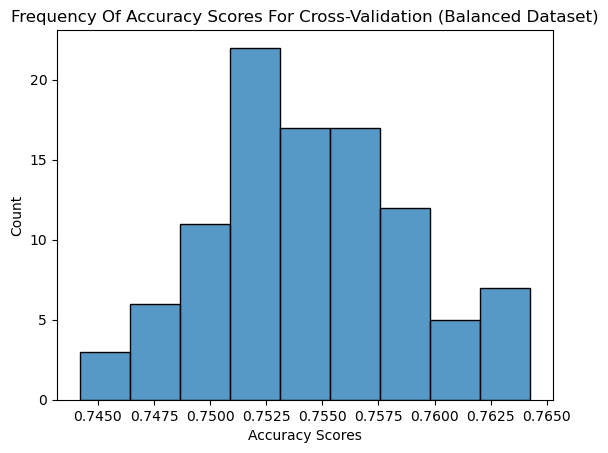

In [26]:
sns.histplot(data=balanced_cross_validate_scores)
plt.title('Frequency of accuracy scores for cross-validation (Balanced Dataset)'.title())
plt.xlabel('Accuracy Scores');

### Classification Report

In [27]:
balanced_classification_report = classification_report(y_test, y_prediction)
print(balanced_classification_report)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      3644
           1       0.76      0.74      0.75      3572

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216



### Confustion Matrix

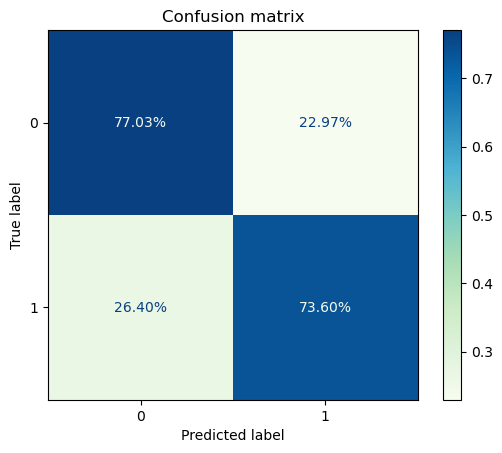

In [28]:
metrics.ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )

plt.grid(False)
plt.title('Confusion matrix') ;

## Conclusions & Future Prospects

1. The Gaussian Naive Bayes Model did not perform well with the unbalanced dataset (lots of false negatives). When the dataset was balanced, the model had less false negatives and an accuracy score of ~75%.

1. Next steps for this project is to increase the accuracy score of the model. This can involve tweaking the parameters of the GaussianNB model, or trying different models (decision trees, random forests, etc.)